In [83]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

plt.style.use('seaborn')
import seaborn as sns
%matplotlib inline

from nltk.corpus import stopwords
from collections import defaultdict

from sklearn.feature_extraction.text import CountVectorizer

In [2]:
trainDF = pd.read_csv('data/train.csv')
testDF = pd.read_csv('data/test.csv')

In [3]:
trainDF.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


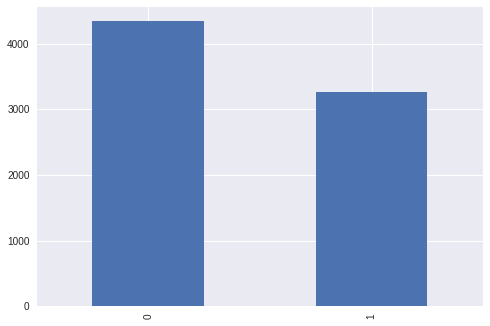

In [4]:
trainDF['target'].value_counts().plot.bar();

In [5]:
trainDF.dropna()['keyword'].value_counts()[:5], testDF.dropna()['keyword'].value_counts()[:5]

(collision     36
 whirlwind     33
 armageddon    32
 fatalities    32
 flames        31
 Name: keyword, dtype: int64,
 survivors      17
 snowstorm      17
 demolished     16
 electrocute    16
 rubble         16
 Name: keyword, dtype: int64)

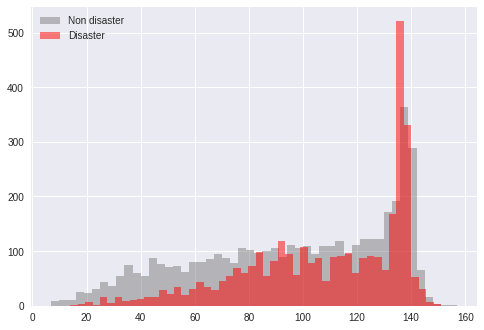

In [6]:
def countWords(sentence):
    count = len(sentence)

    return count
trainDF['len'] = trainDF['text'].map(countWords)
plt.hist(trainDF[trainDF['target']==0]['len'],alpha = 0.5, color = 'grey', label = 'Non disaster', bins = 50)
plt.hist(trainDF[trainDF['target'] == 1]['len'], alpha = 0.5,color = 'r', label = 'Disaster', bins = 50)
plt.legend()
plt.show()

In [7]:
len(trainDF['text'][0].split())

13

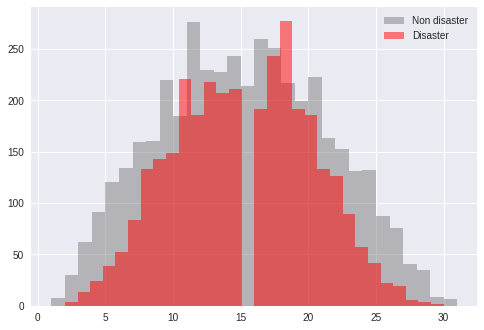

In [8]:
def wordCount(sentence):
    count = len(sentence.split())
    return count
trainDF['NumWords'] = trainDF['text'].map(wordCount)
plt.hist(trainDF[trainDF['target'] == 0]['NumWords'], color = 'grey', alpha = 0.5, label = 'Non disaster', bins = 30)
plt.hist(trainDF[trainDF['target'] == 1]['NumWords'], color = 'r', alpha = 0.5, label = 'Disaster', bins = 30)
plt.legend()
plt.show()


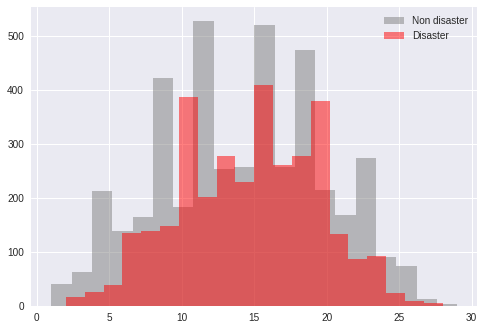

In [9]:
def uniqueWordsCnt(sentence):
    count = len(set(sentence.split()))
    return count

trainDF['numUnique'] = trainDF['text'].map(uniqueWordsCnt)

plt.hist(trainDF[trainDF['target'] == 0]['numUnique'], color = 'grey', alpha = 0.5, label = 'Non disaster', bins = 20)
plt.hist(trainDF[trainDF['target'] == 1]['numUnique'], color = 'r', alpha = 0.5, label = 'Disaster', bins = 20)
plt.legend()
plt.show()

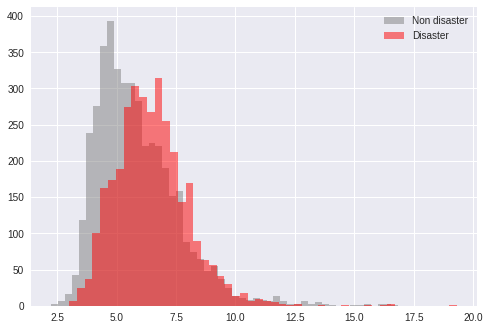

In [10]:
def meanWordLength(sentence):
    lengths = [len(word) for word in sentence.split()]
    return np.mean(lengths)
trainDF['meanLength'] = trainDF['text'].map(meanWordLength)
plt.hist(trainDF[trainDF['target'] == 0]['meanLength'], color = 'grey', alpha = 0.5, label = 'Non disaster', bins = 50)
plt.hist(trainDF[trainDF['target'] == 1]['meanLength'], color = 'r', alpha = 0.5, label = 'Disaster', bins = 50)
plt.legend()
plt.show()

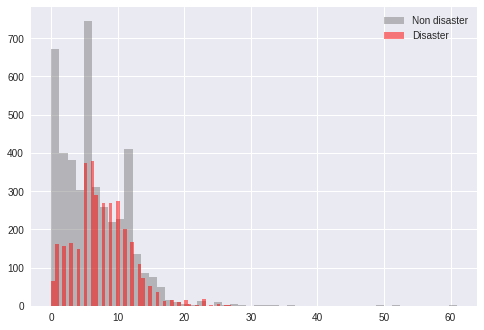

In [11]:
import string

trainDF["punctuationCnt"] = trainDF["text"].map(
    lambda x: len([c for c in str(x) if c in string.punctuation])
)

plt.hist(trainDF[trainDF['target'] == 0]['punctuationCnt'], color = 'grey', alpha = 0.5, label = 'Non disaster', bins = 50)
plt.hist(trainDF[trainDF['target'] == 1]['punctuationCnt'], color = 'r', alpha = 0.5, label = 'Disaster', bins = 50)
plt.legend()
plt.show()


In [14]:
def generate_ngrams(text, n_gram=1, stop=True):
    """
    Simple n-gram generator.
    """
    stop = set(stopwords.words("english")) if stop else {}

    token = [
        token for token in text.lower().split(" ") if token != "" if token not in stop
    ]
    z = zip(*[token[i:] for i in range(n_gram)])
    ngrams = [" ".join(ngram) for ngram in z]

    return ngrams

In [16]:
disaster_unigrams = defaultdict(int)
nondisaster_unigrams = defaultdict(int)

In [17]:
for text in trainDF[trainDF.target == 1].text:
    for word in generate_ngrams(text):
        disaster_unigrams[word] += 1

for text in trainDF[trainDF.target == 0].text:
    for word in generate_ngrams(text):
        nondisaster_unigrams[word] += 1

In [38]:
df_disaster_unigrams = pd.DataFrame(
    sorted(disaster_unigrams.items(), key = lambda x: x[1], reverse=True)
)
df_nondisaster_unigrams = pd.DataFrame(
    sorted(nondisaster_unigrams.items(), key = lambda x:x[1], reverse=True)
)

In [39]:
df_disaster_unigrams.head()

,0,1
0,-,389
1,fire,150
2,via,117
3,&amp;,105
4,...,105


In [45]:
df_disaster_unigrams.columns

RangeIndex(start=0, stop=2, step=1)

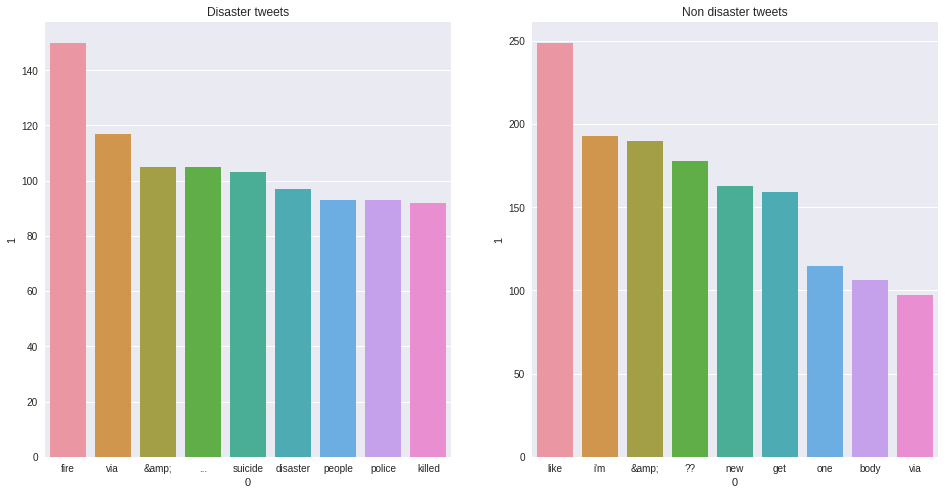

In [58]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize = (16,8))
ax[0].set_title('Disaster tweets')
sns.barplot(x = df_disaster_unigrams.iloc[1:10,0],y = df_disaster_unigrams.iloc[1:10,1], ax = ax[0])
ax[1].set_title('Non disaster tweets')
sns.barplot(x = df_nondisaster_unigrams.iloc[1:10,0],y = df_nondisaster_unigrams.iloc[1:10,1],ax = ax[1])
plt.show()

/home/rodrigo/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


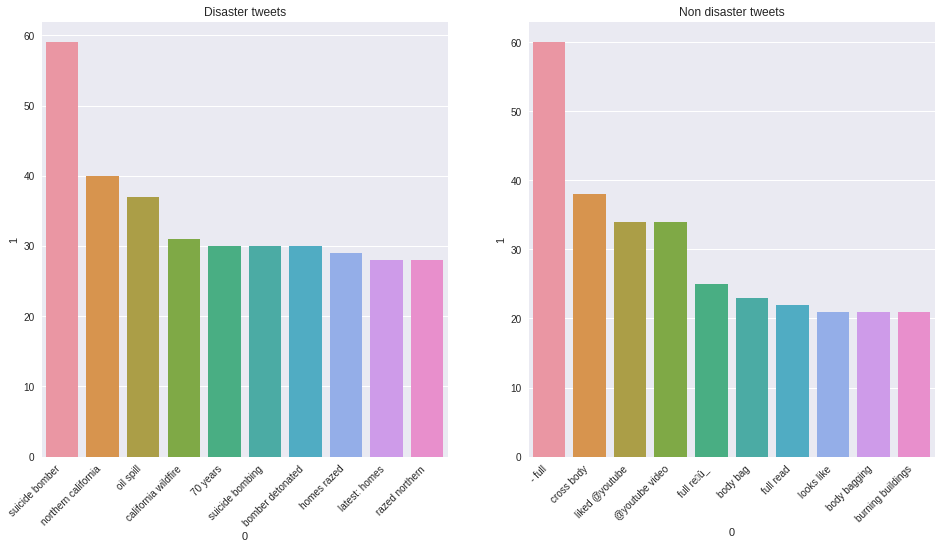

In [81]:
disasterBigrams = defaultdict(int)
nonDisasterBigrams = defaultdict(int)

for text in trainDF[trainDF.target == 1].text:
    for word in generate_ngrams(text, n_gram=2):
        disasterBigrams[word] += 1

for text in trainDF[trainDF.target == 0].text:
    for word in generate_ngrams(text, n_gram=2):
        nonDisasterBigrams[word] += 1

dfDisasterBigrams = pd.DataFrame(
    sorted(disasterBigrams.items(), key=lambda x:x[1], reverse=True)
)
dfNonDisasterBigrams = pd.DataFrame(
    sorted(nonDisasterBigrams.items(), key = lambda x: x[1], reverse=True)
)

fig, ax = plt.subplots(ncols=2, nrows=1, figsize = (16,8))
ax[0].set_title('Disaster tweets')
labels = ax[0].get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
sns.barplot(x = dfDisasterBigrams.iloc[:10,0],y = dfDisasterBigrams.iloc[:10,1], ax = ax[0])
ax[1].set_title('Non disaster tweets')
labels = ax[1].get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
sns.barplot(x = dfNonDisasterBigrams.iloc[:10,0],y = dfNonDisasterBigrams.iloc[:10,1],ax = ax[1])
plt.show();

In [85]:
def get_top_text_ngrams(corpus, ngrams=(1, 1), nr=None):
    """
    Creates a bag of ngrams and counts ngram frequency.
    
    Returns a sorted list of tuples: (ngram, count)
    """
    vec = CountVectorizer(ngram_range=ngrams).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:nr]

In [86]:
top_text_bigrams = get_top_text_ngrams(trainDF.text, ngrams=(2, 2), nr=10)
top_text_bigrams

[('http co', 4306),
 ('https co', 410),
 ('in the', 308),
 ('of the', 256),
 ('û_ http', 217),
 ('on the', 129),
 ('to the', 126),
 ('to be', 108),
 ('for the', 97),
 ('at the', 85)]

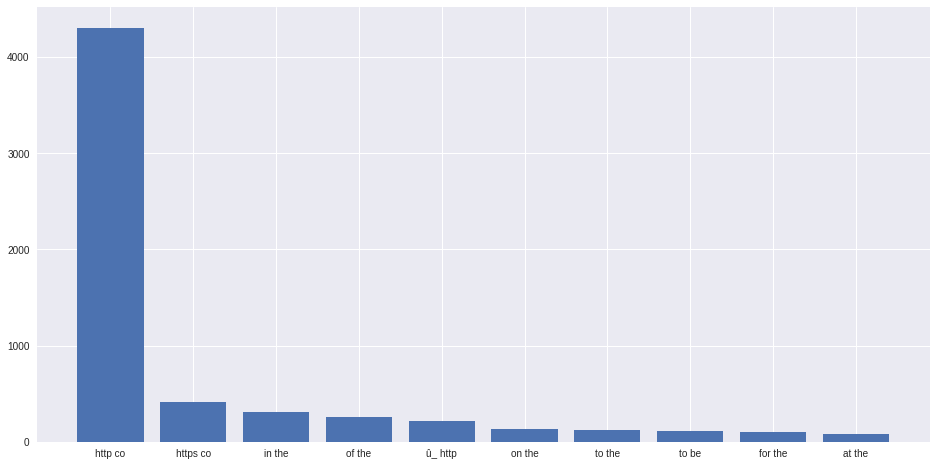

In [88]:
x, y = zip(*top_text_bigrams)
plt.figure(1, figsize=(16, 8))
plt.subplot(1, 1, 1)
plt.bar(x, y);

In [104]:
def createCorpus(text):
    words = []
    for texts in text.str.split():
        for word in texts:
            words.append(word)
    return words

In [107]:
nonDisasterCorpus = createCorpus(trainDF[trainDF['target'] == 0]['text'])
disasterCorpus = createCorpus(trainDF[trainDF['target'] == 1]['text'])

stop = set(stopwords.words('english'))
d0 = defaultdict(int)
d1 = defaultdict(int)

for word in nonDisasterCorpus:
    if word in stop:
        d0[word] += 1

for word in disasterCorpus:
    if word in stop:
        d1[word] += 1